In [3]:
import pandas as pd
import os
from datetime import date, datetime
import requests

PATH = "2017-capitalbikeshare-tripdata"
df_2017 = pd.DataFrame()

for csv in os.listdir(path=PATH):
    df = pd.read_csv(f'{PATH}/{csv}')
    df_2017 = pd.concat([df_2017, df], sort=True)

    

In [4]:
os.listdir(path=PATH)

['2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbikeshare-tripdata.csv',
 '2017Q4-capitalbikeshare-tripdata.csv']

In [5]:
response = requests.get('https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json')
stations = pd.DataFrame(response.json()['data']['stations'])

In [7]:
new_stations = stations[["name", "lon", "lat"]]
new_stations = new_stations.rename(columns={"name": "Start name"})


In [10]:
new_df = pd.merge(df_2017, new_stations, how = "inner", left_on = "Start station", right_on = "Start name")


In [11]:
new_df.sort_values(by=["Member type"])["Duration"].mean()
new_df[new_df["Member type"] == "Casual"]["Duration"].mean()
new_df[new_df["Member type"] == "Member"]["Duration"].mean()

728.341192652757

In [12]:
new_df["Start_date_datetime"] = pd.to_datetime(new_df["Start date"])
new_df["month"] = new_df['Start_date_datetime'].dt.month

In [13]:
new_df["Start station"].value_counts()
new_df["End station"].value_counts()

Columbus Circle / Union Station                          70062
Lincoln Memorial                                         65884
Jefferson Dr & 14th St SW                                59259
Massachusetts Ave & Dupont Circle NW                     46702
15th & P St NW                                           43305
Jefferson Memorial                                       42525
Smithsonian-National Mall / Jefferson Dr & 12th St SW    42406
Henry Bacon Dr & Lincoln Memorial Circle NW              40659
4th St & Madison Dr NW                                   37751
14th & V St NW                                           33159
Eastern Market Metro / Pennsylvania Ave & 7th St SE      32404
New Hampshire Ave & T St NW                              32316
1st & M St NE                                            31338
8th & H St NW                                            30522
Thomas Circle                                            30513
5th & K St NW                                          

In [14]:
data_frame_only_casual = new_df[new_df["Member type"] == "Casual"]
data_frame_only_members = new_df[new_df["Member type"] == "Member"]


In [15]:
data_frame_only_members["Duration"].mean(), data_frame_only_casual["Duration"].mean()


#probably casuals use it more for sightseeing spending more time on the bikes and regulars more for commute hence shorter distances 

(728.341192652757, 2339.9337551637454)

In [17]:
data_frame_only_members.groupby("month")["Duration"].mean(), data_frame_only_casual.groupby("month")["Duration"].mean()

#duration of the rides is not based on the month that much, we can see that numbers don't change much with the weather 

(month
 1     682.369525
 2     693.763348
 3     691.969568
 4     745.339846
 5     728.039751
 6     747.628883
 7     748.387875
 8     746.485531
 9     763.101894
 10    744.281727
 11    706.467164
 12    670.733829
 Name: Duration, dtype: float64, month
 1     2343.207293
 2     2488.619058
 3     2425.412557
 4     2585.231638
 5     2335.035854
 6     2369.853487
 7     2462.185547
 8     2194.828134
 9     2196.057976
 10    2188.118261
 11    2136.701354
 12    2030.644061
 Name: Duration, dtype: float64)

In [24]:
data_frame_only_members.groupby("month").count()


,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number,Start name,lon,lat,Start_date_datetime
month,,,,,,,,,,,,,
1,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935
2,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781
3,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174
4,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699
5,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121
6,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684
7,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536
8,259934,259934,259934,259934,259934,259934,259934,259934,259934,259934,259934,259934,259934
9,264912,264912,264912,264912,264912,264912,264912,264912,264912,264912,264912,264912,264912


In [25]:
data_frame_only_casual.groupby("month").count()

,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number,Start name,lon,lat,Start_date_datetime
month,,,,,,,,,,,,,
1,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541
2,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484
3,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392
4,116643,116643,116643,116643,116643,116643,116643,116643,116643,116643,116643,116643,116643
5,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537
6,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710
7,130156,130156,130156,130156,130156,130156,130156,130156,130156,130156,130156,130156,130156
8,114566,114566,114566,114566,114566,114566,114566,114566,114566,114566,114566,114566,114566
9,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127


In [23]:
data_frame_only_casual.groupby("month").count().sort_values("Duration") 

#more tourists in April (Cherry Blossom? :)) and during summer months, difference between min and max is almost 7 times

#in the top months it is as much as the less months casual

#in December when the casual rides are the least, they are only 11% of total volume

#however, in top month they account for 35% of the total volume

,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number,Start name,lon,lat,Start_date_datetime
month,,,,,,,,,,,,,
12,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756
1,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541,20541
11,39448,39448,39448,39448,39448,39448,39448,39448,39448,39448,39448,39448,39448
2,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484,41484
3,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392
10,86757,86757,86757,86757,86757,86757,86757,86757,86757,86757,86757,86757,86757
5,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537
9,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127,99127
6,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710,111710


In [26]:
data_frame_only_members.groupby("month").count().sort_values("Duration")  

#more regular riders in September, October and much less in colder months (almost half between min and max)

,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number,Start name,lon,lat,Start_date_datetime
month,,,,,,,,,,,,,
1,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935,142935
12,147529,147529,147529,147529,147529,147529,147529,147529,147529,147529,147529,147529,147529
2,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781,169781
3,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174,180174
11,195640,195640,195640,195640,195640,195640,195640,195640,195640,195640,195640,195640,195640
5,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121,224121
4,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699,224699
7,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536,239536
6,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684,258684


In [30]:
weather = pd.read_csv("allweather.csv")
weather.drop("Unnamed: 0", axis = 1, inplace = True)

,Unnamed: 0,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,41.88,0.45,23.06,0.44,partly-cloudy-night,NaN,0.0,0.0,NaN,1015.02,Partly Cloudy,43.68,1483246800,0,6.850,221.0,9.23,3.66
1,1,42.00,0.90,23.47,0.45,cloudy,NaN,0.0,0.0,NaN,1015.52,Overcast,43.33,1483250400,0,6.740,232.0,8.00,3.12
2,2,42.09,0.52,23.72,0.48,partly-cloudy-night,NaN,0.0,0.0,NaN,1015.94,Mostly Cloudy,42.09,1483254000,0,6.893,227.0,4.56,1.36
3,3,40.64,0.22,23.90,0.51,partly-cloudy-night,NaN,0.0,0.0,NaN,1016.63,Partly Cloudy,40.64,1483257600,0,6.807,224.0,3.30,0.87
4,4,39.25,0.03,24.04,0.54,clear-night,NaN,0.0,0.0,NaN,1017.28,Clear,39.25,1483261200,0,6.807,254.0,2.61,0.71


In [31]:
import datetime

weather["normal time"] = pd.to_datetime(weather['time'], unit='s')

In [32]:
weather["time in DC"] = (weather["normal time"]).dt.tz_localize('UTC').dt.tz_convert('US/Eastern').dt.tz_localize(None)


In [33]:
final_merged = pd.merge_asof(new_df.sort_values(by = "Start_date_datetime"), weather, left_on = "Start_date_datetime", right_on = "time in DC")

In [34]:
final_merged.drop(["Bike number", "Start station number", "End station number", "precipAccumulation", "End date", "lon", "lat", "precipIntensity", "cloudCover", "temperature", "pressure", "icon", "uvIndex", "precipType", "visibility", "windBearing", "windGust", "normal time"], axis = 1, inplace = True)

In [35]:
aggregated_df = final_merged.groupby(["time in DC", "humidity", "precipProbability", "apparentTemperature", "windSpeed"])[["Start station"]].count().reset_index()

In [36]:
aggregated_df_by_count = aggregated_df.rename(columns={"Start station": "count"})

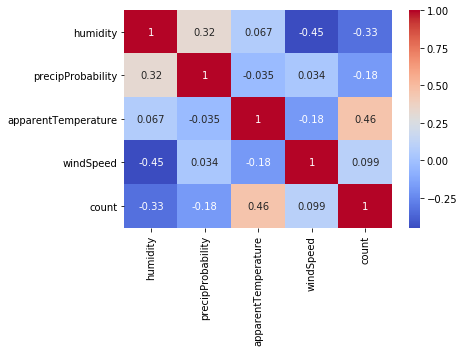

In [37]:
import seaborn as sns 
%matplotlib inline

sns.heatmap(aggregated_df_by_count.corr(), annot = True, cmap = "coolwarm")